<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(0)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n250.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,75.125241,84.922404,34.972066,68.259011,-0.363912,272.914810,273.335423,-0.420613
1,0.0,1.0,25.707258,75.671899,78.801281,77.725542,-0.845719,267.060261,267.685673,-0.625413
2,0.0,2.0,93.961521,94.415264,37.686187,75.730122,0.292766,312.085860,311.969362,0.116498
3,0.0,3.0,64.134941,35.627512,20.932261,37.451962,-0.773438,167.373238,168.179917,-0.806679
4,0.0,4.0,60.575248,93.071781,52.078179,38.832006,0.375342,254.932555,254.475315,0.457240
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,93.142144,21.647726,28.303506,66.690736,-0.939674,218.844438,219.760792,-0.916355
249996,999.0,246.0,51.993810,73.718794,35.008163,62.642083,1.102634,234.465483,233.534923,0.930560
249997,999.0,247.0,73.384466,90.437758,47.227303,48.878704,1.317432,271.245663,270.212957,1.032706
249998,999.0,248.0,90.516651,20.235445,55.927670,65.625684,-0.254542,242.050907,242.284173,-0.233266


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,75.125241,84.922404,34.972066,68.259011,-0.363912,272.914810,273.335423,-0.420613
1,0.0,1.0,25.707258,75.671899,78.801281,77.725542,-0.845719,267.060261,267.685673,-0.625413
2,0.0,2.0,93.961521,94.415264,37.686187,75.730122,0.292766,312.085860,311.969362,0.116498
3,0.0,3.0,64.134941,35.627512,20.932261,37.451962,-0.773438,167.373238,168.179917,-0.806679
4,0.0,4.0,60.575248,93.071781,52.078179,38.832006,0.375342,254.932555,254.475315,0.457240
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,93.142144,21.647726,28.303506,66.690736,-0.939674,218.844438,219.760792,-0.916355
249996,999.0,246.0,51.993810,73.718794,35.008163,62.642083,1.102634,234.465483,233.534923,0.930560
249997,999.0,247.0,73.384466,90.437758,47.227303,48.878704,1.317432,271.245663,270.212957,1.032706
249998,999.0,248.0,90.516651,20.235445,55.927670,65.625684,-0.254542,242.050907,242.284173,-0.233266


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    75.125241  84.922404  34.972066  68.259011 -0.363912  272.914810   
      1.0    25.707258  75.671899  78.801281  77.725542 -0.845719  267.060261   
      2.0    93.961521  94.415264  37.686187  75.730122  0.292766  312.085860   
      3.0    64.134941  35.627512  20.932261  37.451962 -0.773438  167.373238   
      4.0    60.575248  93.071781  52.078179  38.832006  0.375342  254.932555   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  93.142144  21.647726  28.303506  66.690736 -0.939674  218.844438   
      246.0  51.993810  73.718794  35.008163  62.642083  1.102634  234.465483   
      247.0  73.384466  90.437758  47.227303  48.878704  1.317432  271.245663   
      248.0  90.516651  20.235445  55.927670  65.625684 -0.254542  242.050907   
      249.0  30.383457  46.995649  92.747817  23.940444  0.390660  204.458026   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.335423 -0.420613  
      1.0    267.685673 -0.625413  
      2.0    311.969362  0.116498  
      3.0    168.179917 -0.806679  
      4.0    254.475315  0.457240  
...                 ...       ...  
999.0 245.0  219.760792 -0.916355  
      246.0  233.534923  0.930560  
      247.0  270.212957  1.032706  
      248.0  242.284173 -0.233266  
      249.0  204.233092  0.224934  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    75.125241  84.922404  34.972066  68.259011 -0.363912  272.914810   
      1.0    25.707258  75.671899  78.801281  77.725542 -0.845719  267.060261   
      2.0    93.961521  94.415264  37.686187  75.730122  0.292766  312.085860   
      3.0    64.134941  35.627512  20.932261  37.451962 -0.773438  167.373238   
      4.0    60.575248  93.071781  52.078179  38.832006  0.375342  254.932555   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  93.142144  21.647726  28.303506  66.690736 -0.939674  218.844438   
      246.0  51.993810  73.718794  35.008163  62.642083  1.102634  234.465483   
      247.0  73.384466  90.437758  47.227303  48.878704  1.317432  271.245663   
      248.0  90.516651  20.235445  55.927670  65.625684 -0.254542  242.050907   
      249.0  30.383457  46.995649  92.747817  23.940444  0.390660  204.458026   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.335423 -0.420613  
      1.0    267.685673 -0.625413  
      2.0    311.969362  0.116498  
      3.0    168.179917 -0.806679  
      4.0    254.475315  0.457240  
...                 ...       ...  
999.0 245.0  219.760792 -0.916355  
      246.0  233.534923  0.930560  
      247.0  270.212957  1.032706  
      248.0  242.284173 -0.233266  
      249.0  204.233092  0.224934  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,75.125241,84.922404,34.972066,68.259011,-0.363912,272.914810,273.335423,-0.420613
1,0.0,1.0,25.707258,75.671899,78.801281,77.725542,-0.845719,267.060261,267.685673,-0.625413
2,0.0,2.0,93.961521,94.415264,37.686187,75.730122,0.292766,312.085860,311.969362,0.116498
3,0.0,3.0,64.134941,35.627512,20.932261,37.451962,-0.773438,167.373238,168.179917,-0.806679
4,0.0,4.0,60.575248,93.071781,52.078179,38.832006,0.375342,254.932555,254.475315,0.457240
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,93.142144,21.647726,28.303506,66.690736,-0.939674,218.844438,219.760792,-0.916355
249996,999.0,246.0,51.993810,73.718794,35.008163,62.642083,1.102634,234.465483,233.534923,0.930560
249997,999.0,247.0,73.384466,90.437758,47.227303,48.878704,1.317432,271.245663,270.212957,1.032706
249998,999.0,248.0,90.516651,20.235445,55.927670,65.625684,-0.254542,242.050907,242.284173,-0.233266


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    75.125241  84.922404  34.972066  68.259011 -0.363912  272.914810   
      1.0    25.707258  75.671899  78.801281  77.725542 -0.845719  267.060261   
      2.0    93.961521  94.415264  37.686187  75.730122  0.292766  312.085860   
      3.0    64.134941  35.627512  20.932261  37.451962 -0.773438  167.373238   
      4.0    60.575248  93.071781  52.078179  38.832006  0.375342  254.932555   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  93.142144  21.647726  28.303506  66.690736 -0.939674  218.844438   
      246.0  51.993810  73.718794  35.008163  62.642083  1.102634  234.465483   
      247.0  73.384466  90.437758  47.227303  48.878704  1.317432  271.245663   
      248.0  90.516651  20.235445  55.927670  65.625684 -0.254542  242.050907   
      249.0  30.383457  46.995649  92.747817  23.940444  0.390660  204.458026   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.335423 -0.420613  
      1.0    267.685673 -0.625413  
      2.0    311.969362  0.116498  
      3.0    168.179917 -0.806679  
      4.0    254.475315  0.457240  
...                 ...       ...  
999.0 245.0  219.760792 -0.916355  
      246.0  233.534923  0.930560  
      247.0  270.212957  1.032706  
      248.0  242.284173 -0.233266  
      249.0  204.233092  0.224934  

[250000 rows x 8 columns]

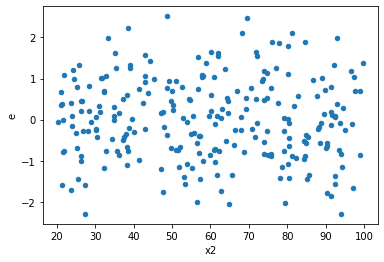

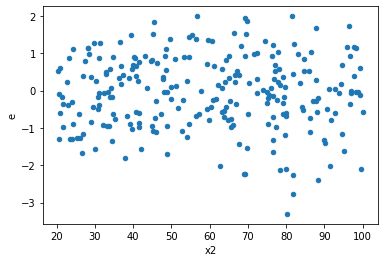

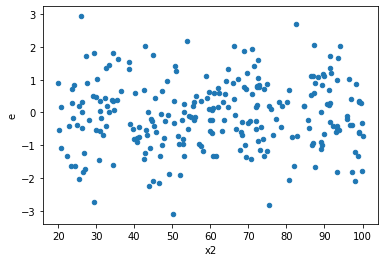

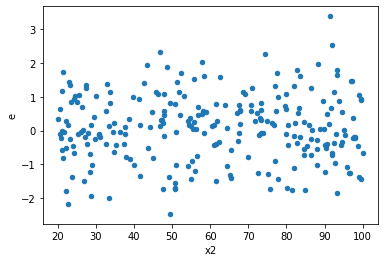

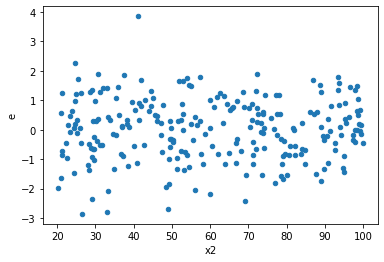

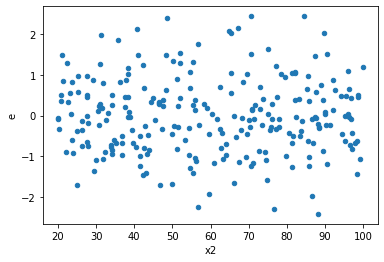

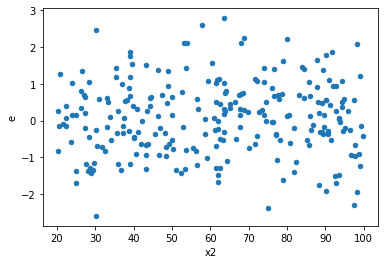

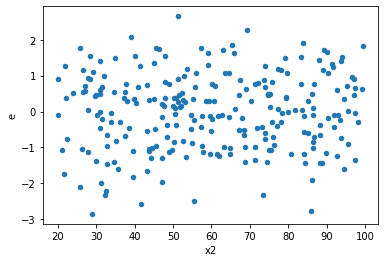

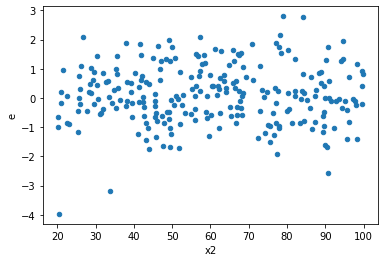

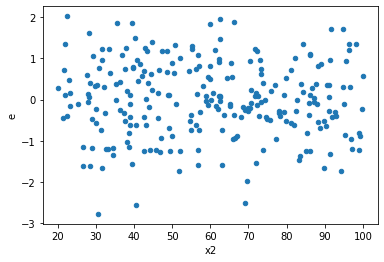

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,79.26952262909931,95.54831182335437,0.8257241940531178,0.995294914826608,1.205360000342417,0.3617776934882615,0.8191111532558693,0.18088884674413075,Reject001=1 : Homoscedasticity
1.0,96.0,96.0,73.10249176653306,117.71380164229716,0.7614842892347194,1.2261854337739286,1.6102570349891618,0.020507299359965536,0.9897463503200172,0.010253649679982768,Reject001=1 : Homoscedasticity
5.0,96.0,96.0,76.76611265722669,77.40869898493892,0.7996470068461113,0.8063406144264471,1.0083707029764746,0.9675103827274552,0.5162448086362724,0.4837551913637276,Reject001=1 : Homoscedasticity
6.0,96.0,96.0,87.73623188642115,91.2367460572298,0.9139190821502203,0.950382771429477,1.039898159466664,0.8484024502936816,0.5757987748531592,0.4242012251468408,Reject001=1 : Homoscedasticity
8.0,96.0,96.0,101.09469434729075,106.56693219566351,1.0530697327842786,1.1100722103714948,1.0541298223779576,0.7967417238219623,0.6016291380890189,0.39837086191098114,Reject001=1 : Homoscedasticity
10.0,96.0,96.0,68.65358302444993,104.58959998922013,0.7151414898380201,1.0894749998877098,1.5234397883060546,0.04041677839277047,0.9797916108036148,0.020208389196385235,Reject001=1 : Homoscedasticity
11.0,96.0,96.0,92.8294068054135,101.90921832138058,0.9669729875563906,1.061554357514381,1.0978118015447405,0.6484647150239902,0.6757676424880049,0.3242323575119951,Reject001=1 : Homoscedasticity
13.0,96.0,96.0,89.92492667800092,92.40938525950378,0.9367179862291762,0.962597763119831,1.0276281413094626,0.8940633499600934,0.5529683250199533,0.4470316749800467,Reject001=1 : Homoscedasticity
14.0,96.0,96.0,85.51737019879218,102.05472402913216,0.8908059395707518,1.0630700419701267,1.19338005591025,0.38798548788212583,0.8060072560589371,0.19399274394106292,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,79.26952262909931,95.54831182335437,0.8257241940531178,0.995294914826608,1.205360000342417,0.3617776934882615,Reject001=1 : Homoscedasticity
1.0,96.0,96.0,73.10249176653306,117.71380164229716,0.7614842892347194,1.2261854337739286,1.6102570349891618,0.020507299359965536,Reject001=1 : Homoscedasticity
2.0,96.0,96.0,116.86050559582596,107.3760292235781,1.2172969332898538,1.1185003044122719,0.9188393347787583,0.6792189191693504,Reject001=1 : Homoscedasticity
3.0,96.0,96.0,98.56840562779466,96.75842965864292,1.0267542252895276,1.0079003089441971,0.981637361813618,0.927844126376105,Reject001=1 : Homoscedasticity
4.0,96.0,96.0,128.53953911547885,83.20086843457814,1.3389535324529047,0.866675712860189,0.6472784094848136,0.03424781738602894,Reject001=1 : Homoscedasticity
5.0,96.0,96.0,76.76611265722669,77.40869898493892,0.7996470068461113,0.8063406144264471,1.0083707029764746,0.9675103827274552,Reject001=1 : Homoscedasticity
6.0,96.0,96.0,87.73623188642115,91.2367460572298,0.9139190821502203,0.950382771429477,1.039898159466664,0.8484024502936816,Reject001=1 : Homoscedasticity
7.0,96.0,96.0,124.77935534879569,99.96124117468415,1.299784951549955,1.0412629289029598,0.8011040039056342,0.27903486722476273,Reject001=1 : Homoscedasticity
8.0,96.0,96.0,101.09469434729075,106.56693219566351,1.0530697327842786,1.1100722103714948,1.0541298223779576,0.7967417238219623,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      989
Reject001=0 : Heteroscedasticity     11
Name: Result_test, dtype: int64